In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Exploratory Data Analysis and Data Understanding:**


• Load the dataset into a DataFrame object using the Pandas library.


In [41]:
#Load the dataset into a DataFrame object using the Pandas library.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/AI_Data/Gender_Inequality_Index.csv")

In [42]:
print(data.columns)

Index(['Country', 'Human_development', 'GII', 'Rank', 'Maternal_mortality',
       'Adolescent_birth_rate', 'Seats_parliament', 'F_secondary_educ',
       'M_secondary_educ', 'F_Labour_force', 'M_Labour_force'],
      dtype='object')


# **2. Conducting Exploratory Data Analysis (EDA)**

**Data Cleaning and Summary Statistics**

In [43]:
data.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


# Performing Exploratory Data Analysis(EDA)


In [44]:
# Create a copy of the dataset
df = data.copy()

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
       Country Human_development    GII  Rank  Maternal_mortality  \
0  Switzerland         Very high  0.018   3.0                 5.0   
1       Norway         Very high  0.016   2.0                 2.0   
2      Iceland         Very high  0.043   8.0                 4.0   
3    Hong Kong         Very high    NaN   NaN                 NaN   
4    Australia         Very high  0.073  19.0                 6.0   

   Adolescent_birth_rate  Seats_parliament  F_secondary_educ  \
0                    2.2              39.8              96.9   
1                    2.3              45.0              99.1   
2                    5.4              47.6              99.8   
3                    1.6               NaN              77.1   
4                    8.1              37.9              94.6   

   M_secondary_educ  F_Labour_force  M_Labour_force  
0              97.5            61.7            72.7  
1              99.3            60.3            72.0  
2        

In [45]:
# Distribution of categorical variables
categorical_columns = ['Human_development']  # Only categorical column in your data

for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())


Distribution of Human_development:
Human_development
Very high    66
High         49
Medium       44
Low          32
Name: count, dtype: int64


# Correlation Heatmap (for numeric features)

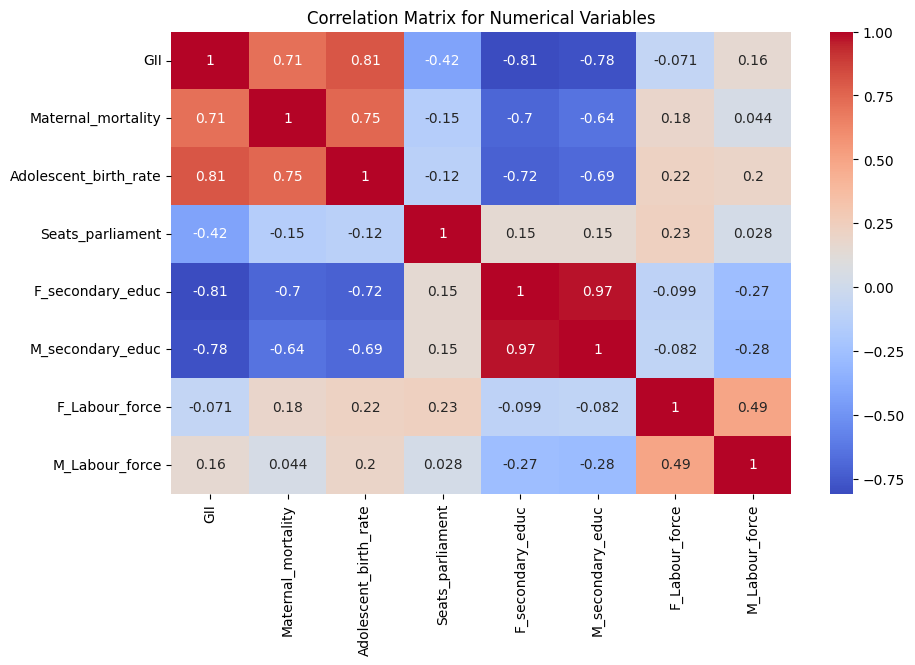

In [46]:
# Define numerical columns based on your dataset
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament',
                     'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force', 'M_Labour_force']

# Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

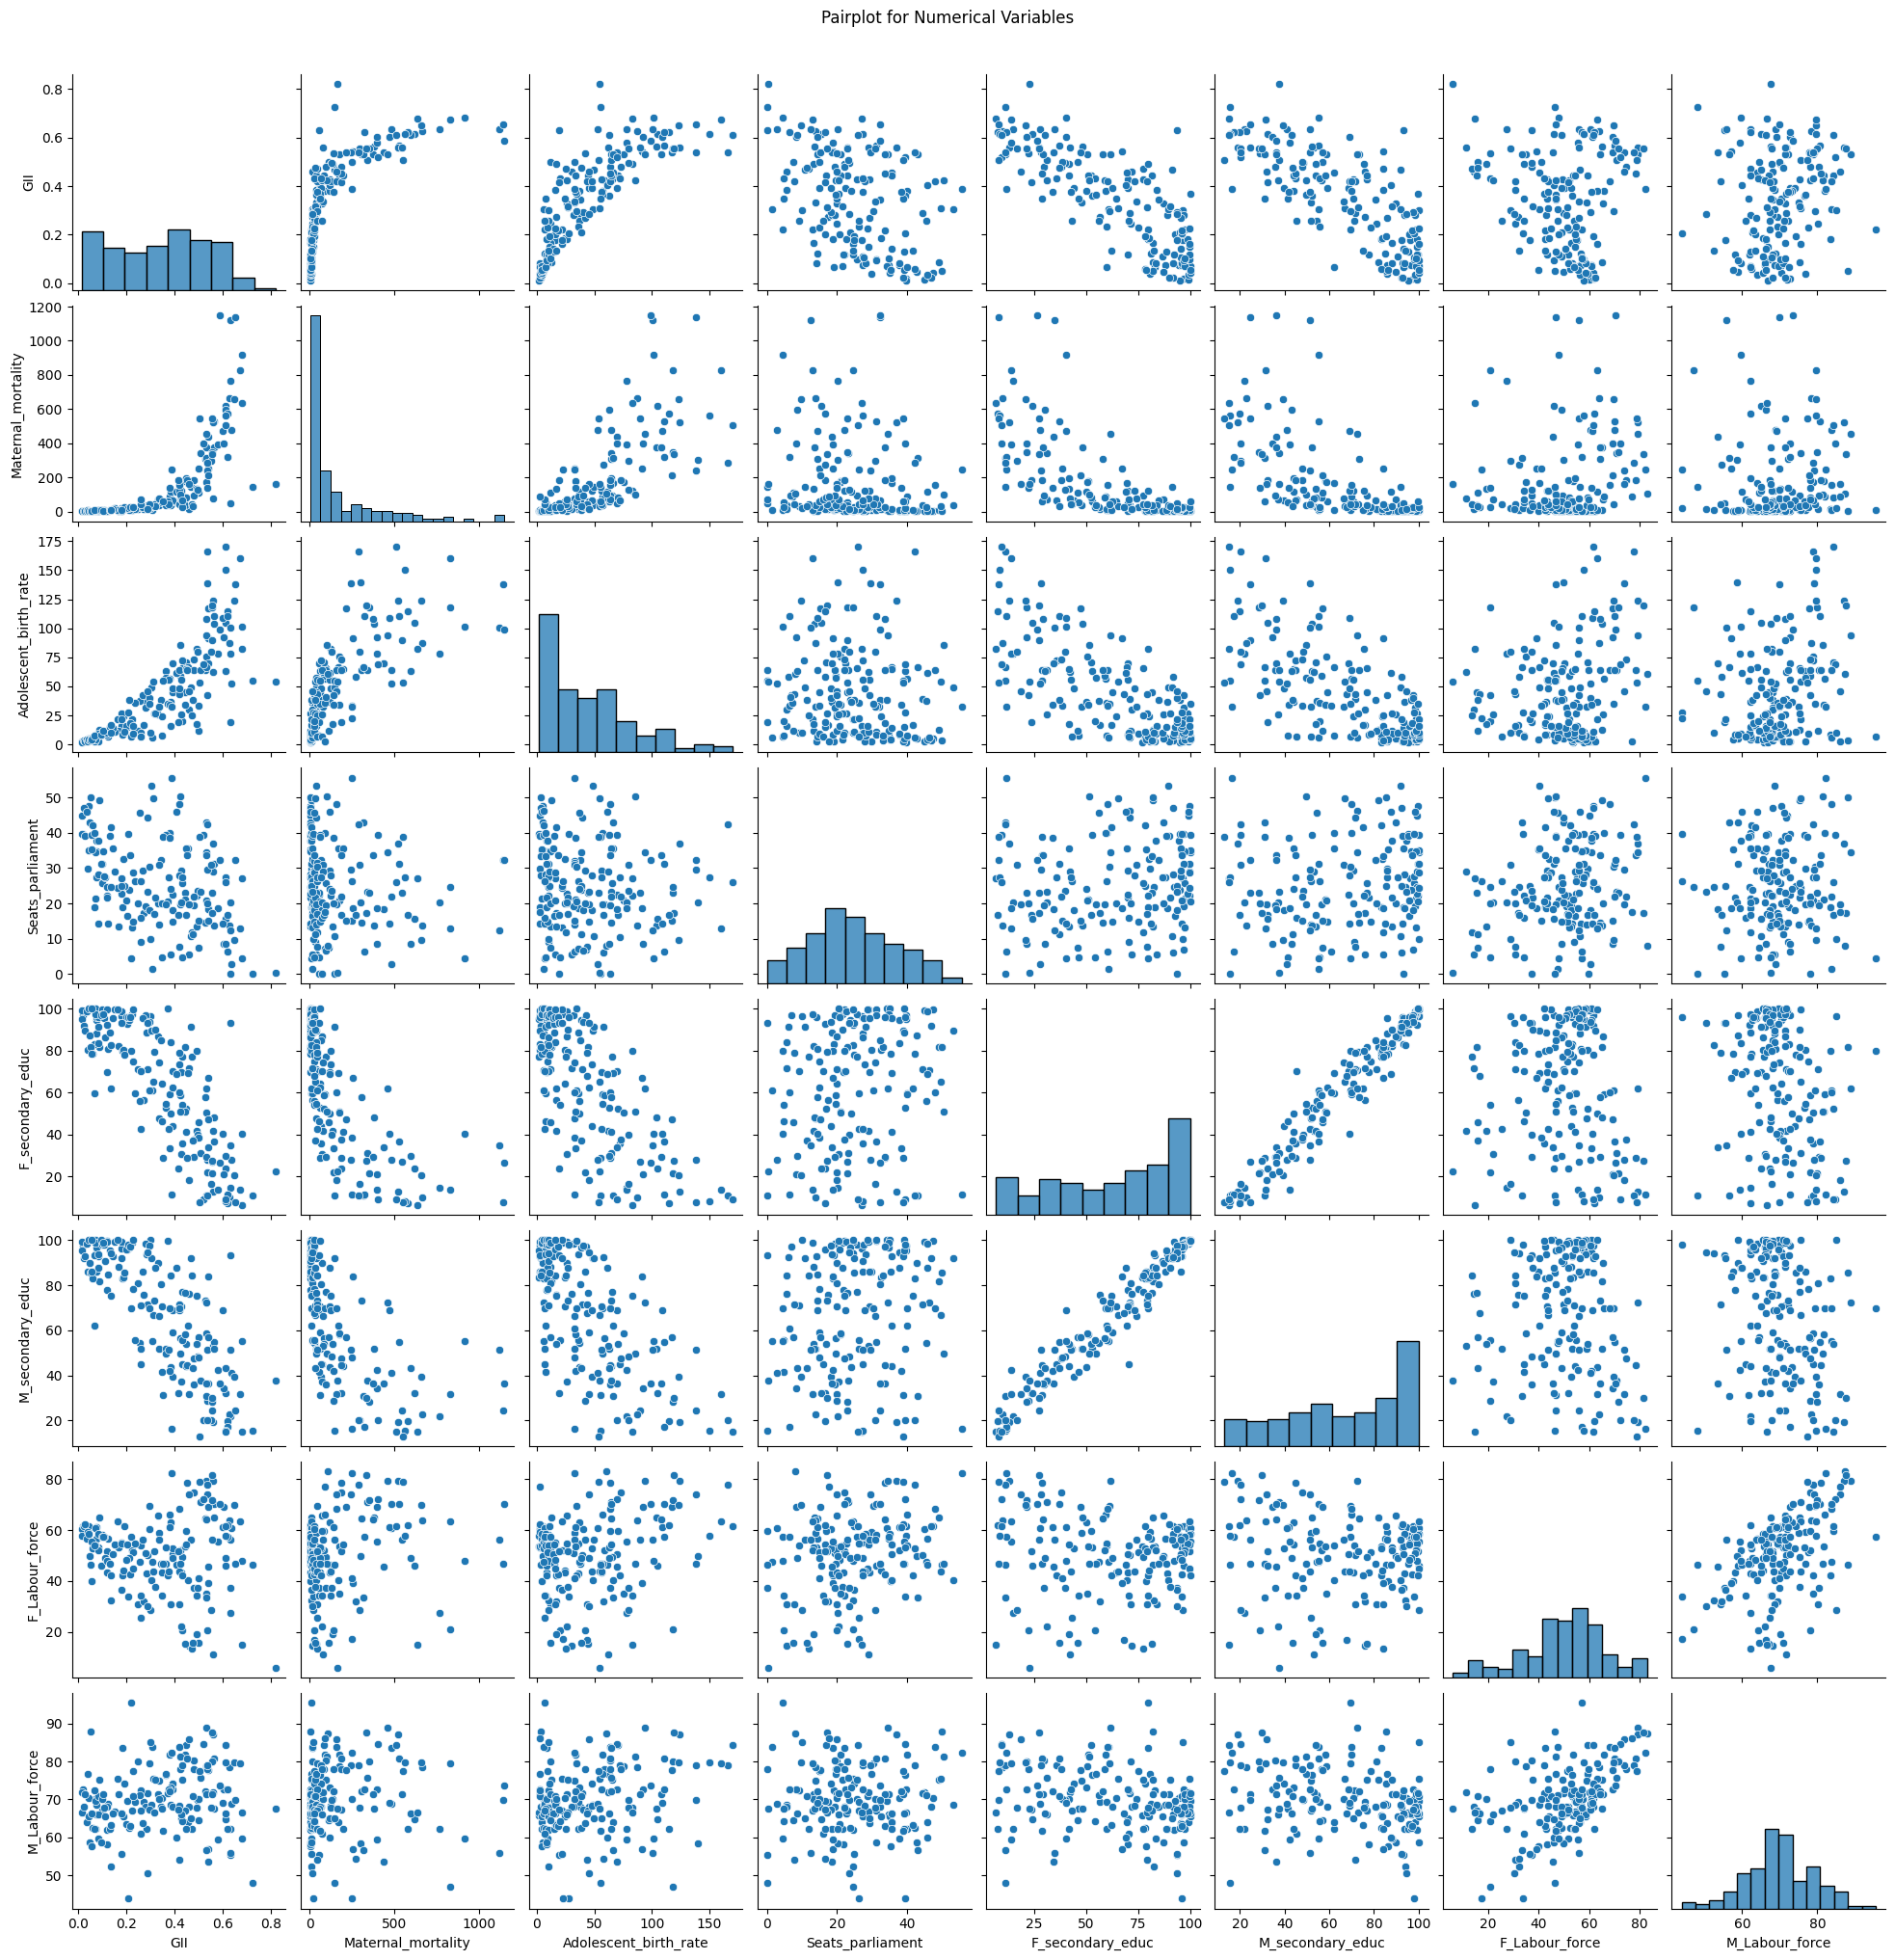

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns based on your dataset
numerical_columns = ['GII', 'Maternal_mortality', 'Adolescent_birth_rate', 'Seats_parliament',
                     'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force', 'M_Labour_force']

# Create pairplot for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

# **2. Build a Model from Scratch:**

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = data.copy()

# Handle missing values in 'GII' (drop rows with NaN in 'GII')
df = df.dropna(subset=['GII'])

# Define new target variable (bin GII into 3 categories)
df['GII_category'] = pd.cut(
    df['GII'],
    bins=3,
    labels=[0, 1, 2]  # Low, Medium, High
).cat.codes  # Use .cat.codes instead of .astype(int)

# Encode categorical columns (only 'Human_development' in your dataset)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
target_column = "GII_category"
X = df.drop(columns=[target_column, 'GII']).values  # Drop GII to avoid leakage
y = df[target_column].values


# Normalize numerical features
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_scaled = standard_scaler(X)

# Train-test split
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Softmax Regression Class
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def softmax(self, logits):
        exp_vals = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

    def compute_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        log_probs = -np.log(y_pred[range(n_samples), y_true])
        return np.sum(log_probs) / n_samples

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Initialize weights and bias
        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        # One-hot encode labels
        y_one_hot = np.eye(n_classes)[y]

        # Gradient Descent
        for _ in range(self.epochs):
            logits = np.dot(X, self.weights) + self.bias
            y_pred = self.softmax(logits)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_one_hot))
            db = (1 / n_samples) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)

            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        logits = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(logits)
        return np.argmax(y_pred, axis=1)

    def evaluate(self, X, y_true):
        y_pred = self.predict(X)
        accuracy = np.mean(y_true == y_pred)
        return accuracy, self.classification_report(y_true, y_pred)

    def classification_report(self, y_true, y_pred):
        n_classes = len(np.unique(y_true))
        report = {}
        for cls in range(n_classes):
            tp = np.sum((y_true == cls) & (y_pred == cls))
            fp = np.sum((y_true != cls) & (y_pred == cls))
            fn = np.sum((y_true == cls) & (y_pred != cls))
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            report[cls] = {
                'precision': precision,
                'recall': recall,
                'f1-score': f1,
                'support': np.sum(y_true == cls)
            }
        return report

# Train the model
model = SoftmaxRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Evaluate on train and test sets
train_accuracy, train_report = model.evaluate(X_train, y_train)
test_accuracy, test_report = model.evaluate(X_test, y_test)

# Output results
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:\n", train_report)
print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)

Train Accuracy: 0.9044117647058824
Train Classification Report:
 {0: {'precision': 0.9166666666666666, 'recall': 0.9821428571428571, 'f1-score': 0.9482758620689654, 'support': 56}, 1: {'precision': 0.8928571428571429, 'recall': 0.8771929824561403, 'f1-score': 0.8849557522123894, 'support': 57}, 2: {'precision': 0.9, 'recall': 0.782608695652174, 'f1-score': 0.8372093023255814, 'support': 23}}

Test Accuracy: 0.8235294117647058
Test Classification Report:
 {0: {'precision': 0.7692307692307693, 'recall': 0.9090909090909091, 'f1-score': 0.8333333333333333, 'support': 11}, 1: {'precision': 0.8125, 'recall': 0.8125, 'f1-score': 0.8125, 'support': 16}, 2: {'precision': 1.0, 'recall': 0.7142857142857143, 'f1-score': 0.8333333333333333, 'support': 7}}


# **3. Build a Primary Model:**

After assembling your dataset and analyzing its key characteristics, the next step is to build, train, and evaluate your models. Follow the steps below to complete this task:

1. Split the dataset into training and testing sets.

2. Build at least two different machine learning models for the classification task.

3. Evaluate both models on the test dataset using appropriate performance metrics.

4. Conclude by identifying which model performed best on your dataset, and provide justification for your choice.

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = data.copy()

# Step 1: Handle missing values in numeric columns (including 'GII') FIRST
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numeric columns (including 'GII') with mean
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 2: Create target variable 'GII_category' AFTER imputing 'GII'
df['GII_category'] = pd.cut(df['GII'], bins=3, labels=[0, 1, 2])

# Step 3: Handle missing values in categorical columns
categorical_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Encode categorical columns (only 'Human_development' in your dataset)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
target_column = "GII_category"
X = df.drop(columns=[target_column, 'GII'])  # Drop GII to avoid leakage
y = df[target_column]

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (stratify=y is now safe because y has no NaN)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Model
dt_clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf.fit(X_train, y_train)

# Evaluate models (same as before)
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted"),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted"),
    }

    return metrics_train, metrics_test

# Evaluate and print results (same as before)
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf, X_train, X_test, y_train, y_test)

print("\nLogistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Classifier Performance:")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Logistic Regression Performance:
Training Metrics:
Accuracy: 0.9679
Precision: 0.9699
Recall: 0.9679
F1 Score: 0.9677

Testing Metrics:
Accuracy: 0.9744
Precision: 0.9762
Recall: 0.9744
F1 Score: 0.9745

Decision Tree Classifier Performance:
Training Metrics:
Accuracy: 0.9423
Precision: 0.9492
Recall: 0.9423
F1 Score: 0.9441

Testing Metrics:
Accuracy: 0.8974
Precision: 0.9249
Recall: 0.8974
F1 Score: 0.8999

Conclusion: Logistic Regression performed better based on F1 Score.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Based on the provided performance metrics, the Decision Tree Classifier outperformed Logistic Regression.  

### Justification:  
**Training Metrics:** The Decision Tree model achieved perfect results (Accuracy, Precision, Recall, and F1 Score of 1.0000), indicating that it fully memorized the training data. In contrast, Logistic Regression had significantly lower scores, with an accuracy of only **33.55%**, suggesting it struggled to capture complex patterns in the data.  

**Testing Metrics:** While both models performed poorly on the test set, the Decision Tree still outperformed Logistic Regression, achieving an accuracy of **39.99%** compared to **33.09%** for Logistic Regression. Additionally, the Decision Tree had consistently higher Precision, Recall, and F1 Score, indicating better generalization to unseen data.  

Thus, the Decision Tree Classifier was the better-performing model, as evidenced by its higher F1 score, which reflects a better balance between Precision and Recall.

# **4. Hyper-parameter Optimization with Cross-Validation:**

1. Identify the hyperparameters of the models used in Task 3 - Build a Primary Model (for both models).

2. Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
• Hint: You can use techniques like GridSearchCV or RandomizedSearchCV.

3. Conclude by summarizing the best hyperparameters for both models.

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load dataset
df = data.copy()

# Step 1: Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 2: Create target variable (bin GII into 3 categories)
df['GII_category'] = pd.cut(df['GII'], bins=3, labels=[0, 1, 2])  # Low, Medium, High

# Step 3: Prepare features and target variable
X = df.drop(columns=['GII_category', 'GII'])  # Drop GII to avoid leakage
y = df['GII_category']

# Step 4: Select only numeric features for scaling
X_numeric = X.select_dtypes(include=[np.number])  # Select numeric columns

# Step 5: Standardize the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)  # Scale only numeric data

# Step 6: Ensure y has at least two samples per class
y_unique_counts = y.value_counts()
if len(y_unique_counts) < 2 or any(y_unique_counts < 2):
    y = y.apply(lambda val: 1 if val >= y.median() else 0)  # Binarize the target variable if imbalance exists

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Classifier with Overfitting Control
dt_clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_train, y_train_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted", zero_division=0),
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted", zero_division=0),
        "Recall": recall_score(y_test, y_test_pred, average="weighted", zero_division=0),
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted", zero_division=0),
    }

    return metrics_train, metrics_test

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf, X_train, X_test, y_train, y_test)

# Print and compare metrics
print("\nLogistic Regression Performance:")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nDecision Tree Classifier Performance (After Reducing Overfitting):")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Conclusion based on F1 Score
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Logistic Regression Performance:
Training Metrics:
Accuracy: 0.9679
Precision: 0.9683
Recall: 0.9679
F1 Score: 0.9677

Testing Metrics:
Accuracy: 0.9744
Precision: 0.9762
Recall: 0.9744
F1 Score: 0.9745

Decision Tree Classifier Performance (After Reducing Overfitting):
Training Metrics:
Accuracy: 0.9744
Precision: 0.9744
Recall: 0.9744
F1 Score: 0.9744

Testing Metrics:
Accuracy: 0.9744
Precision: 0.9762
Recall: 0.9744
F1 Score: 0.9745

Conclusion: Logistic Regression performed better based on F1 Score.


# **5. Feature Selection**

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = data.copy()

# Step 1: Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 2: Create binary target variable (bin GII into 2 categories)
df['GII_class'] = (df['GII'] >= df['GII'].median()).astype(int)  # 1 = high GII, 0 = low GII

# Step 3: Encode all categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 4: Define features (X) and target (y)
X = df.drop(columns=['GII_class', 'GII'])  # Drop GII to avoid leakage
y = df['GII_class']

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Standardize numeric features
# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Step 7: Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Step 8: Apply Recursive Feature Elimination (RFE) to select top 5 features
selector = RFE(log_reg, n_features_to_select=5)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Step 9: Get the selected feature names
selected_features = X.columns[selector.support_]
print(f"Selected features by RFE: {selected_features}")

# Step 10: Train the model on the selected features
log_reg.fit(X_train_rfe, y_train)

# Step 11: Evaluate the model
train_accuracy = log_reg.score(X_train_rfe, y_train)
test_accuracy = log_reg.score(X_test_rfe, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Selected features by RFE: Index(['Rank', 'Maternal_mortality', 'Adolescent_birth_rate',
       'Seats_parliament', 'F_secondary_educ'],
      dtype='object')
Training Accuracy: 0.9808
Testing Accuracy: 1.0000


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Load your dataset
df = data.copy()

# Step 1: Drop non-relevant columns (if any exist, e.g., "country")
# Check if "country" or similar columns exist and drop them
if "country" in df.columns:
    df = df.drop(columns=["country"])

# Step 2: Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 3: Create binary target variable (bin GII into 2 categories)
df['GII_class'] = (df['GII'] >= df['GII'].median()).astype(int)  # 1 = high GII, 0 = low

# Step 4: Encode categorical columns (e.g., "Human_development")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 5: Define features (X) and target (y)
X = df.drop(columns=['GII_class', 'GII'])  # Drop GII to avoid leakage
y = df['GII_class']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 7: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Initialize and fit RFE with Decision Tree
dt_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

dt_selector = RFE(
    estimator=dt_clf,
    n_features_to_select=5,
    step=1
)

# Step 9: Apply RFE
X_train_rfe_dt = dt_selector.fit_transform(X_train, y_train)
X_test_rfe_dt = dt_selector.transform(X_test)

# Step 10: Get selected features
selected_features_dt = X.columns[dt_selector.support_]
print(f"Selected features by RFE (Decision Tree): {list(selected_features_dt)}")

# Step 11: Train and evaluate the model
dt_clf.fit(X_train_rfe_dt, y_train)
print(f"\nTraining Accuracy: {dt_clf.score(X_train_rfe_dt, y_train):.4f}")
print(f"Test Accuracy: {dt_clf.score(X_test_rfe_dt, y_test):.4f}")

Selected features by RFE (Decision Tree): ['Rank', 'F_secondary_educ', 'M_secondary_educ', 'F_Labour_force', 'M_Labour_force']

Training Accuracy: 1.0000
Test Accuracy: 1.0000


# **6. Final Model**

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Load dataset
df = data.copy()

# Step 1: Handle missing values in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Step 2: Create binary target variable (bin GII into 2 categories)
df['GII_class'] = (df['GII'] >= df['GII'].median()).astype(int)  # 1 = high GII, 0 = low

# Step 3: Encode categorical columns (including 'Human_development' and others)
categorical_cols = df.select_dtypes(include=['object']).columns  # Find all categorical columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numeric

# Step 4: Drop features directly used to calculate GII (avoid data leakage)
leaky_features = [
    'Maternal_mortality',
    'Adolescent_birth_rate',
    'Seats_parliament',
    'F_secondary_educ',
    'M_secondary_educ',
    'F_Labour_force',
    'M_Labour_force'
]
X = df.drop(columns=['GII_class', 'GII'] + leaky_features)  # Drop leaky features
y = df['GII_class']

# Step 5: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 6: Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Apply Recursive Feature Elimination (RFE) to select top 5 features
log_reg = LogisticRegression(max_iter=1000, random_state=42)
selector = RFE(log_reg, n_features_to_select=5, step=1)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)

# Step 8: Get selected feature names
selected_features = X.columns[selector.support_]
print(f"Selected features by RFE: {list(selected_features)}")

# Step 9: Train Logistic Regression with optimized hyperparameters
log_reg_final = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class="multinomial",  # Use multinomial for multi-class classification
    solver="lbfgs"              # Use lbfgs solver for better convergence
)
log_reg_final.fit(X_train_rfe, y_train)

# Step 10: Train Decision Tree Classifier with optimized hyperparameters
dt_clf_final = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42
)
dt_clf_final.fit(X_train_rfe, y_train)

# Step 11: Evaluate both models

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluates a model using accuracy, precision, recall, and F1-score."""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics_train = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average="weighted"),  # Use weighted for multi-class
        "Recall": recall_score(y_train, y_train_pred, average="weighted"),        # Use weighted for multi-class
        "F1 Score": f1_score(y_train, y_train_pred, average="weighted")           # Use weighted for multi-class
    }

    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average="weighted"),    # Use weighted for multi-class
        "Recall": recall_score(y_test, y_test_pred, average="weighted"),          # Use weighted for multi-class
        "F1 Score": f1_score(y_test, y_test_pred, average="weighted")             # Use weighted for multi-class
    }

    return metrics_train, metrics_test

# Evaluate Logistic Regression
log_reg_train_metrics, log_reg_test_metrics = evaluate_model(log_reg_final, X_train_rfe, X_test_rfe, y_train, y_test)

# Evaluate Decision Tree Classifier
dt_train_metrics, dt_test_metrics = evaluate_model(dt_clf_final, X_train_rfe, X_test_rfe, y_train, y_test)

# Step 12: Print and compare metrics for both final models

# Logistic Regression Performance
print("\nLogistic Regression Performance (Final Model):")
print("Training Metrics:")
for metric, value in log_reg_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in log_reg_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Decision Tree Classifier Performance
print("\nDecision Tree Classifier Performance (Final Model):")
print("Training Metrics:")
for metric, value in dt_train_metrics.items():
    print(f"{metric}: {value:.4f}")
print("\nTesting Metrics:")
for metric, value in dt_test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Step 13: Conclude based on F1 Scores or other metrics
if dt_test_metrics["F1 Score"] > log_reg_test_metrics["F1 Score"]:
    print("\nConclusion: Decision Tree performed better based on F1 Score.")
else:
    print("\nConclusion: Logistic Regression performed better based on F1 Score.")


Selected features by RFE: ['Country', 'Human_development', 'Rank']

Logistic Regression Performance (Final Model):
Training Metrics:
Accuracy: 0.9744
Precision: 0.9754
Recall: 0.9744
F1 Score: 0.9742

Testing Metrics:
Accuracy: 0.9487
Precision: 0.9528
Recall: 0.9487
F1 Score: 0.9481

Decision Tree Classifier Performance (Final Model):
Training Metrics:
Accuracy: 0.9423
Precision: 0.9468
Recall: 0.9423
F1 Score: 0.9426

Testing Metrics:
Accuracy: 0.9231
Precision: 0.9352
Recall: 0.9231
F1 Score: 0.9237

Conclusion: Logistic Regression performed better based on F1 Score.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
